In [16]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import cm
from joblib import dump, load

Text(0.5, 0.92, 'Visualization of Target Curve')

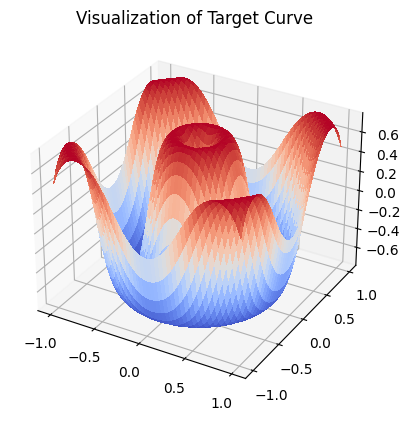

In [2]:
y = np.linspace(-1,1,100)
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.tanh(np.sin(2*3.14*R))


ax = plt.subplot(111, projection = '3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.title("Visualization of Target Curve")

In [17]:
Ntrain = 1000 
# Creating the training data 
Xtrain = np.random.uniform(-1,1, size = (2, Ntrain))
R = np.sqrt(Xtrain[0,:]**2 + Xtrain[1,:]**2)
Ytrain = np.tanh(np.sin(2*3.14*R))

plt.figure(figsize=(8,8))

In [18]:
Ntest = 10000
# Creating the training data 
Xtest = np.random.uniform(-1,1, size = (2, Ntest))
R = np.sqrt(Xtest[0,:]**2 + Xtest[1,:]**2)
Ytest = np.tanh(np.sin(2*3.14*R))

In [37]:
# Training a model 
from sklearn.neural_network import MLPRegressor 

model = MLPRegressor(
    warm_start = True,
    hidden_layer_sizes = (8,8),
    activation = 'tanh',
    alpha = 0e-3,
    solver = 'adam',
    max_iter = 100000, 
    tol=1e-9, 
    verbose = True,
    n_iter_no_change=1000
)

model.fit(Xtrain.T, Ytrain.T)

Iteration 1, loss = 0.54035960
Iteration 2, loss = 0.48694886
Iteration 3, loss = 0.43890405
Iteration 4, loss = 0.39589310
Iteration 5, loss = 0.35713378
Iteration 6, loss = 0.32399074
Iteration 7, loss = 0.29558771
Iteration 8, loss = 0.27119586
Iteration 9, loss = 0.25089868
Iteration 10, loss = 0.23421089
Iteration 11, loss = 0.22028069
Iteration 12, loss = 0.20940142
Iteration 13, loss = 0.20028185
Iteration 14, loss = 0.19336088
Iteration 15, loss = 0.18783066
Iteration 16, loss = 0.18345107
Iteration 17, loss = 0.17975645
Iteration 18, loss = 0.17707777
Iteration 19, loss = 0.17476476
Iteration 20, loss = 0.17299522
Iteration 21, loss = 0.17136426
Iteration 22, loss = 0.16992128
Iteration 23, loss = 0.16876424
Iteration 24, loss = 0.16761518
Iteration 25, loss = 0.16669785
Iteration 26, loss = 0.16579192
Iteration 27, loss = 0.16493542
Iteration 28, loss = 0.16420110
Iteration 29, loss = 0.16352659
Iteration 30, loss = 0.16287867
Iteration 31, loss = 0.16223903
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='tanh', alpha=0.0, hidden_layer_sizes=(8, 8),
             max_iter=100000, n_iter_no_change=1000, tol=1e-09, verbose=True,
             warm_start=True)

(-1.0, 1.0)

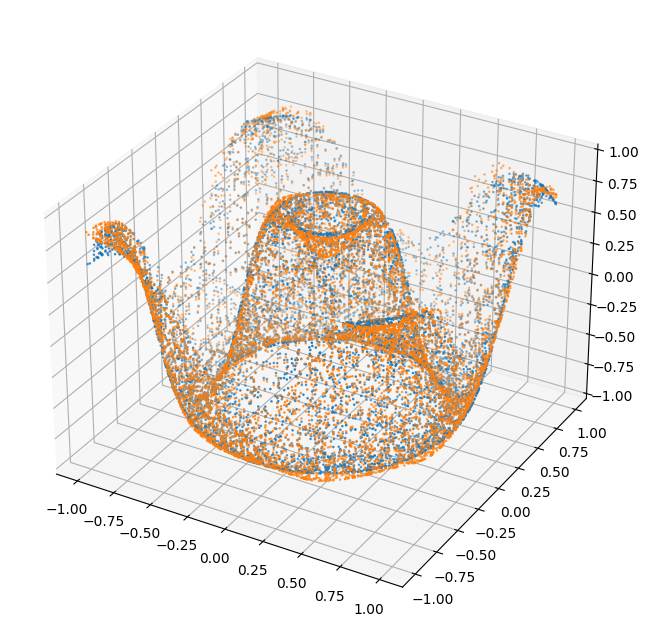

In [38]:
Yhat = model.predict(Xtest.T)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = '3d')

ax.scatter(Xtest[0,:],Xtest[1,:],Ytest, s = 0.75)
ax.scatter(Xtest[0,:], Xtest[1,:], Yhat, s = 0.75)
ax.set_zlim([-1,1])

In [41]:
# Designating the truncation amount 
k = 7


# Reducing the dimensionality of the weights 
A1 = model.coefs_[0].T # Getting the first set of weights 
b1 = model.intercepts_[0]

H1 = A1 @ Xtrain + np.outer(b1, np.ones(Ntrain))
U, S, Vt = np.linalg.svd(H1)

H1k = U[:k,:k] @ U[:,:k].T @ (H1)

left = np.vstack((Xtrain, np.ones(Ntrain)))
W = np.linalg.lstsq(left.T, H1k.T, rcond=None)[0].T
A1k = W[:,:-1]
b1k = W[:,-1]

A2 = model.coefs_[1].T # Getting the first set of weights 
b2 = model.intercepts_[1]

H2 = A2 @ np.tanh(H1) + np.outer(b2, np.ones(Ntrain))
U, S, Vt = np.linalg.svd(H2)

H2k = U[:k, :k] @ U[:,:k].T @ (H2)

left = np.vstack((np.tanh(H1k), np.ones(Ntrain)))
W = np.linalg.lstsq(left.T, H2k.T, rcond=None)[0].T
A2k = W[:,:-1]
b2k = W[:,-1]

A3 = model.coefs_[2].T 
b3 = model.intercepts_[2]

left = np.vstack((np.tanh(H2k), np.ones(Ntrain)))
W = np.linalg.lstsq(left.T, Ytrain, rcond=None)[0].T
A3k = W[:-1].reshape(1,-1)
b3k = np.array([W[-1]])

# Copying the model 
dump(model, "CachedModel.pkl")
new_model = load("CachedModel.pkl")

# Saving the new weights to the model 
new_model.coefs_ = [
    A1k.T, A2k.T, A3k.T
]
new_model.intercepts_ = [
    b1k, b2k, b3k
]


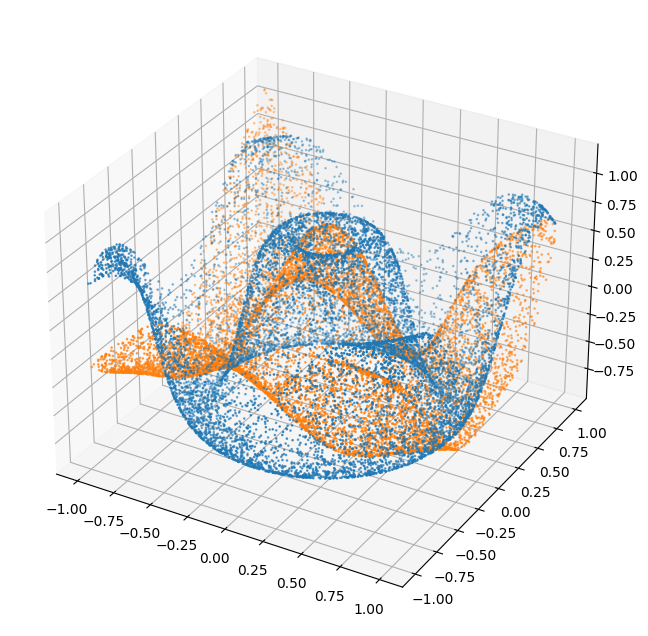

In [42]:
Yhat = new_model.predict(Xtest.T)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = '3d')

ax.scatter(Xtest[0,:],Xtest[1,:],Ytest, s = 0.75)
ax.scatter(Xtest[0,:], Xtest[1,:], Yhat, s = 0.75)